### Preganancy data prediction & interpretability: Term or pre-term.

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

<img src="Image/structure_Classification.png">

### Preq

In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
from heapq import nlargest 

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# start h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from c:\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpjmo55_9y
  JVM stdout: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpjmo55_9y\h2o_Zi_Wei_Fan_started_from_python.out
  JVM stderr: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpjmo55_9y\h2o_Zi_Wei_Fan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,4 months and 27 days !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_3ss0x9
H2O cluster total nodes:,1
H2O cluster free memory:,1.747 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


### Read the Training & Production data.

In [3]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

pd.options.display.max_columns = None

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
training_seq_no = frame_training['Seq no']
production_seq_no = frame_production['Seq no']

- Drop 'Seq No.', 'Training =1, Validation = 2' and for binary classification, 
- Categorize lables to be a factor.

In [5]:
target='Gestational Category at Delivery'

In [6]:
frame_training = frame_training.drop('Training =1, Validation = 2').drop('Seq no')
frame_production = frame_production.drop('Training =1, Validation = 2').drop('Seq no')

frame_training.head(3)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,No,No,No,No,No,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,Done,Yes,No,No,No,No,GBS not reported,No,No,No,No,No,No,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222
Term,20.29,38.99,2,0,24.6,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,Yes,No,Yes,No,No,145.187,100.242,0.03125,1.64485,21.5582,0.15625,74.4387,14553.9,4.53709,238.811,3129.96,22.6855,10807.5,3.13257,164.883,2161.04,15.6629,7461.91,0.0514015,0.673692,0.00488281,2.32621,35.4599,0.257008,122.44,3.36846,1604.76,11.6311,12.2552,5.72527,0.00155872,5,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.12331,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.0133933,0.680468,0.474022,0.225636,0.8927

In [7]:
frame_training[target].asfactor()
frame_training[target].types

{'Gestational Category at Delivery': 'enum'}

### <font color='red'>Session 1: Comparison training & production. </font>

#### 1.0: convert to pd frame for some pre-processing.

In [8]:
pd_frame_training = frame_training.as_data_frame()
pd_frame_production = frame_production.as_data_frame()

- 2 categories in target:

In [9]:
pd_frame_training['Gestational Category at Delivery'].unique()

array(['Term', 'Preterm (?20 weeks < 37 weeks)'], dtype=object)

#### 1.1: Compare columns numbers of T & P data:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production, to be predicted.

In [10]:
#print('Training column number: ', len(pd_frame_training.columns))
#print('Production column number: ',len(pd_frame_production.columns))
#print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

#### 1.2: Exploration based on raw data:

- __Training:__  Without pre-processing the data: null data, encoder etc.

In [11]:
desc_training=pd_frame_training.describe()
desc_training

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,25.940555,93.895057,7.236559e+05,4609.891160,3830.542488,6.947935e+04,18586.897351,72609.782904,9530.978112,11673.388449,1.386575e+05,41532.986099,118785.686501,54.568113,2041.957433,240.561174,613.507263,528.762419,232.630565,675.519146,3838.465461,9114.123872,2953.319360,72.148444,80.333631,0.032945,40.119651,2.066391,2.011123,1.710343,2.078247,2.069107,1.775669,2.226415,1.925634,2.293538,2.284398,1.990960,1.870367,2.238271,2.229131,1.935693,1.937490,1.928350,1.634912,2.296254,2.002816,1.993676,3.151964,2.851184,3.219088,3.209947,2.916510,2.795917,3.163821,3.154680,2.861242,2.863040,2.853900,2.560462,3.221804,2.928366,2.919226,3.011208,3.379112,3.369972,3.076534,3.078331,3.069191,2.775753,3.437095,3.143657,3.134517,3.023064,3.013924,2.720486,3.381828,3.088390,3.079250,3.081047,2.787609,2.778469,3.146373,1.407484,1.601779,0.850318,1.373258,1.367690,1.097323,2.311831,1.808942,1.913138,2.133441,1.253170,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,22.949406,62.788515,1.165532e+06,14269.084400,15859.129459,2.098357e+05,27597.303876,96951.103234,26967.146120,73338.854767,3.911068e+05,58948.563430,159041.084509,351.104849,18379.487244,740.785080,1026.129651,2183.857122,1376.237577,3179.685802,10890.861390,13341.161537,3534.966560,55.640833,70.789940,0.034559,135.958560,1.623055,2.645685,3.341297,2.164335,1.547358,1.302469,2.896549,3.631241,2.388036,1.967672,1.439544,4.067325,3.998546,2.831825,2.417139,3.652570,3.482825,3.283995,2.392509,1.907063,1.327767,3.323992,3.858974,2.788555,2.439444,2.038114,4.329369,4.307694,3.254676,2.901502,3.867295,3.708180,3.522445,2.777082,2.372223,1.938903,4.660988,4.531481,3.609718,3.123188,4.191105,4.101103,3.791373,3.126876,2.567304,2.276402,5.228521,4.522494,4.198952,4.509955,4.095873,3.037922,4.084808,3.735420,3.628237,2.541233,2.266917,4.958018,3.520468,4.147397,2.030708,1.465184,6.541142,11.364798,5.396326,3.028034,1.677858,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685

 - __Production:__ Without pre-processing the data: null data, encoder etc.

In [12]:
desc_production=pd_frame_production.describe()
desc_production

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,19.731574,125.458490,5.904949e+05,3932.318802,5895.273993,52234.270998,16801.137493,132512.113804,5596.069279,17094.748010,7.645985e+04,26155.672830,1.240323e+05,84.211212,410.819898,148.123518,796.675203,958.505381,385.135907,1468.378228,2076.409953,10004.864693,3368.514862,73.026387,61.321347,0.029579,11.643876,1.939806,1.989915,2.262623,1.929056,1.937343,2.203394,1.794717,2.067425,1.733859,1.742146,2.008196,2.117534,1.783968,1.792255,2.058305,2.056675,2.064963,2.331013,1.731396,1.997447,2.005734,2.862219,3.134927,2.801360,2.809648,3.075698,3.185036,2.851469,2.859756,3.125807,3.124177,3.132464,3.398515,2.798898,3.064948,3.073235,2.989838,2.656272,2.664559,2.930609,2.928980,2.937267,3.203317,2.603700,2.869751,2.878038,2.979089,2.987376,3.253426,2.653809,2.919860,2.928147,2.926517,3.192567,3.200855,2.867288,1.148491,1.366346,1.308655,1.032409,1.236288,2.002603,1.357381,2.649051,1.054961,1.343549,1.308522,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,19.198739,106.243988,1.000191e+06,5990.478843,14840.451771,74516.155686,27919.809857,202432.568972,8618.912169,69011.803322,1.228820e+05,41433.271715,2.269844e+05,312.231888,529.612466,202.591701,1165.975761,3595.085053,1519.330648,5227.538906,2809.012892,14607.673580,5385.326478,62.001336,58.940041,0.031540,42.678288,1.535026,1.612353,3.873464,1.285945,1.564865,1.904961,1.623925,4.226723,1.315540,1.643048,1.539741,4.125202,1.212829,1.598744,1.599127,3.886443,4.122386,3.946708,1.305219,1.195141,1.535989,2.226212,4.413817,1.872960,2.206722,2.347745,4.354861,1.891884,2.248763,2.455452,4.063301,4.335057,4.283252,1.913896,2.087786,2.383785,4.708582,2.000171,2.377437,2.261778,4.444760,4.712961,4.500740,2.073116,1.866757,2.232079,4.328494,4.616063,4.436521,1.995509,1.870577,2.261088,4.352848,4.128620,4.411752,1.880363,1.945334,2.081486,3.294338,1.472810,2.054439,3.059284,2.090600,10.694266,1.695474,2.128319,2.394650,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.

- Filter and get the variables of T & P with difference:

In [13]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)
ne_stacked = (diff_rate>0).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']

In [14]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,0.314672,0.251585,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258,0.012022,0.310043,0.113806,2.445558,0.065256,0.010658,0.244088,0.077339,0.068012,0.194121,0.240538,0.068583,0.322794,0.311255,0.008583,0.116724,0.254659,0.243758,0.059570,0.057950,0.066157,0.298626,0.326244,0.002688,0.006012,0.101231,0.090510,0.149116,0.142473,0.051757,0.122171,0.109541,0.103129,0.084639,0.083586,0.088928,0.246594,0.151097,0.044563,0.050113,0.007147,0.272126,0.264739,0.049793,0.050991,0.044914,0.133475,0.320081,0.095446,0.089116,0.014761,0.008887,0.163809,0.274330,0.057719,0.051604,0.052803,0.126844,0.131960,0.097334,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,0.195360,0.409016,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593,0.102587,0.201050,0.095731,2.185661,0.057347,0.640884,0.137388,0.683070,0.011188,0.316275,0.783671,0.140885,0.815252,0.197575,0.065074,0.014030,2.296875,0.771280,0.511537,0.060177,0.155143,0.167915,0.833032,0.595680,0.135562,0.493116,0.125706,0.488849,0.105461,0.131884,0.005854,1.276934,0.447318,0.181657,0.048238,0.144606,0.177624,0.451010,0.136238,0.186628,0.010108,1.265547,0.518323,0.380855,0.057068,0.129825,0.157611,0.508298,0.375275,0.019857,0.207931,0.020270,0.053549,1.260053,1.189631,0.343566,0.061578,0.095238,0.177597,0.351459,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,0.000000,6.575758,0.398837,0.885472,0.315857,0.736273,0.606665,0.311850,0.693813,4.313906,1.560059,1.203508,2.191914,0.343918,0.525444,0.769088,0.709226,7.904096,7.738909,4.358142,1.631662,12.365850,3.551269,0.052881,0.799734,0.560187,6.132341,0.127029,0.713192,0.399143,0.179356,0.791897,0.

#### The following features are quite different between training and production datasets. 
- The difference rate is '0.3' to filter the variables name in prod and training data.
e.g.:  
<font color='red'>'Gestational Age at Collection' in Std</font>  
<font color='red'>'Parity ' in std, mean, etc</font>
<font color='red'> as below: </font>

In [15]:
for col in diff_rate.columns:
    ind = diff_rate[diff_rate[col]>0.3].index.values
    print(col,':', ind)

Gestational Age at Collection : ['std']
Maternal Age at Recruitment / 1st Sample : []
Gravidity : []
Parity : ['std' 'max']
Maternal BMI : []
B1 : ['min']
B2 : ['mean' 'min' '50%' '75%']
B3 : ['std' 'min' '25%' 'max']
B4 : ['mean' 'min' '25%' '50%']
B5 : ['mean' 'std' 'max']
B6 : ['mean' '25%' '50%']
B7 : ['std' 'min' 'max']
P1 : ['min']
P2 : ['std' 'min' '25%' 'max']
P3 : ['mean' 'min' '50%' 'max']
P4 : ['mean' 'std' 'min' 'max']
P5 : ['min' '25%' '50%' '75%']
P6 : ['mean' 'std' 'min' '75%' 'max']
P7 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P8 : ['mean' 'min' '25%' '50%' '75%' 'max']
P9 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P10 : ['mean' 'std' 'min' '25%' '50%' '75%']
P11 : ['min' 'max']
P12 : ['mean' 'min' '25%' '50%' '75%' 'max']
P13 : ['mean' 'std' 'min' '25%' '75%' 'max']
P14 : ['mean' 'std' 'min' '25%' 'max']
P15 : ['min' '25%' 'max']
P16 : ['mean' 'std' 'min' '25%' '50%' '75%']
P17 : ['mean' 'min' '25%' '50%' '75%']
P18 : ['mean' 'std' 'min' '25%' '50%' 'max']
P19

#### 1.3: Check The top columns with the higher % of null values:  

- __Training__: the top 3 variables with most null values:

In [16]:
dict_pd_frame_training_null_nums = dict(pd_frame_training.isnull().sum())
Top3_null_values = Counter(dict_pd_frame_training_null_nums).most_common(3)
Top3_null_values

[('Microbiology Notes', 79),
 ('Cervical Sludge', 74),
 ('Cervical Funnelling', 74)]

,Total,Percent
Microbiology Notes,79,0.580882
Cervical Blackline Appearance,74,0.544118
Cervical Beaking,74,0.544118
Cervical Funnelling,74,0.544118
Cervical Sludge,74,0.544118


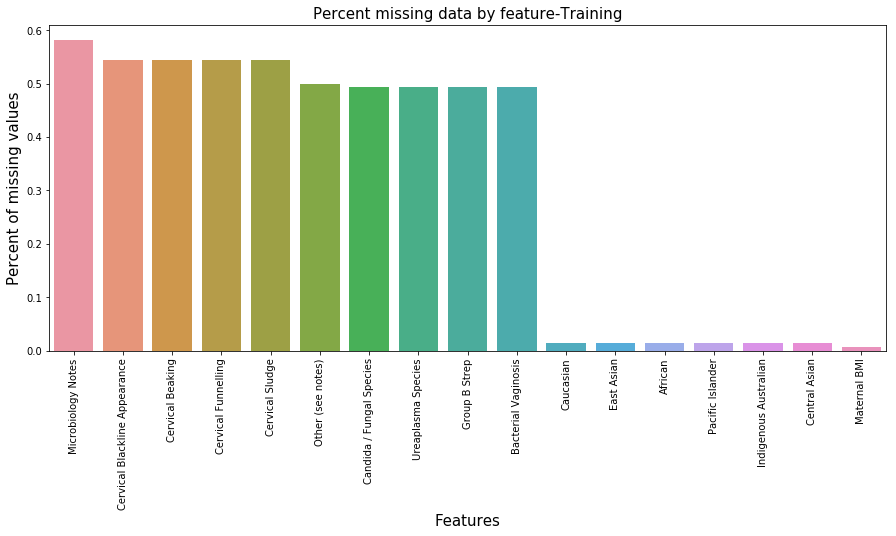

In [17]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_training.index, y=missing_data_training['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature-Training', fontsize=15)
missing_data_training.head()

- __Production__: the top 3 variables with most null values:

,Total,Percent
Cervical Sludge,109,0.726667
Cervical Blackline Appearance,109,0.726667
Cervical Beaking,109,0.726667
Cervical Funnelling,109,0.726667
Microbiology Notes,73,0.486667


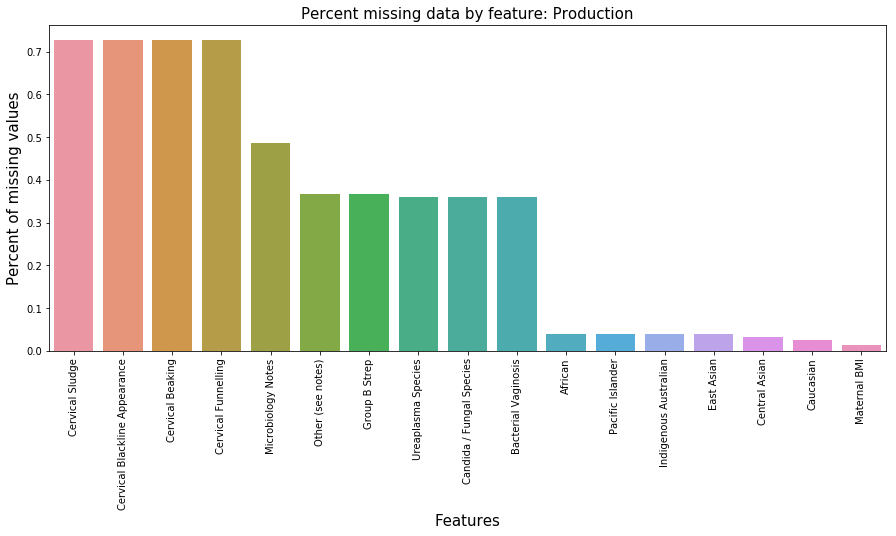

In [18]:
total_null_prod = pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_prod.index, y=missing_data_prod['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature: Production', fontsize=15)
missing_data_prod.head()

#### Note:
- the top 17 features with highest & missing data.

--------------------------------------------
### <font color='red'>Session 1: Exploration Conclusion: </font>
- __Different columns in T & P:__   
  <font color='red'> Gestational Category at Delivery</font> is missed in production, to be predicted.__  
  
- __Difference top variables with null values in T & P:__  
    - Training top 3 features: <font color='red'>'Microbiology Notes', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>;  
    - Production top 3 features: <font color='red'>'Cervical Sludge', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>.  
- __Lots of features have great difference in description information between T & P (>30% difference):__  
    __e.g.:__  
     - Training Parity.std VS Production Parity.std: 0.309125
     - Training B2.mean VS Production B2. mean: 0.3078
-----------------------------------------------

### <font color='red'>2: Data Pre-process:</font>

#### 2.1: Fill the null values in T & P data:

In [19]:
list_top_null = list(missing_data_training.index)

for item in list_top_null:
    pd_frame_training[item].fillna(pd_frame_training[item].mode()[0], inplace=True)

#### -  No null in training data after fill in the missing values with the most common value :

In [20]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_training.head()

,Total,Percent
P102,0,0.0
P8,0,0.0
P6,0,0.0
P5,0,0.0
P4,0,0.0


#### Fill the na in prod:

In [31]:
list_top_null = list(missing_data_prod.index)

for item in list_top_null:
    pd_frame_production[item].fillna(pd_frame_production[item].mode()[0], inplace=True)

#### -  No null in production data with >60% missing percent, after fill in the missing values with the most common value.

In [32]:
total_null_prod= pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_prod.head()

,Total,Percent
P102,0,0.0
P9,0,0.0
P7,0,0.0
P6,0,0.0
P5,0,0.0


#### 2.2: Encoding:

- __Training, production dataset:__ Convert string values in columns except for target into numerical.

In [23]:
from sklearn import preprocessing

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
def encoding_df(df):
    for col in df:
        if col!=target and df[col].dtype=='O':
           #print(col)
            df[col]=le.fit_transform(df[col])

In [26]:
# Encode training data:
encoding_df(pd_frame_training)

In [33]:
# Encode prod data:
encoding_df(pd_frame_production)

#### 2.3: Convert to h2oframe:

#### Training data conversion:

In [34]:
frame_training = h2o.H2OFrame(pd_frame_training)
frame_production = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [35]:
print(frame_training['Gestational Category at Delivery'].types)
print(frame_training['Maternal Age at Recruitment / 1st Sample'].types)
print(frame_training['Short Cervix (< 25 mm)'].types)
print(frame_training['Central Asian'].types)

{'Gestational Category at Delivery': 'enum'}
{'Maternal Age at Recruitment / 1st Sample': 'real'}
{'Short Cervix (< 25 mm)': 'int'}
{'Central Asian': 'int'}


In [36]:
frame_training.head(2)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222


In [37]:
frame_production.head(2)

Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
19.71,40.19,6,1,19.5,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,298.19,261.747,0.450185,2.32042,47.7542,5.05162,146.812,78050.2,134.241,691.925,14239.8,1506.34,43778,117.834,607.361,12499.5,1322.24,38427.7,1.04462,21.4982,2.27416,66.0928,110.81,11.7219,340.666,241.236,7010.91,741.641,29.9008,19.5931,0.0192997,11.2212,0.802725,0.591445,0.806324,1.0632,0.720426,1.82696,0.398706,0.613585,0.870457,0.527687,1.63422,0.402305,0.659177,0.316408,1.42294,0.874056,0.531286,1.63782,0.788159,1.89469,1.55192,0.896438,1.11132,1.36819,1.02542,2.13195,0.900037,1.15691,0.814139,1.92067,1.37179,1.02902,2.13555,1.28589,2.39243,2.04966,0.707298,0.96417,0.621401,1.72794,1.17905,0.836279,1.94281,1.09315,2.19969,1.85692,0.967769,0.624999,1.73153,0.881872,1.98841,1.64564,1.09675,2.20329,1.86052,2.11739,0.151805,0.046644,0.153596,0.28145,0.110842,0.6616,0.0285819,0.0941184,0.172463,0.0679202,0.405406,0.0289191,0.0529914,0.0208694,0.124566,0.174498,0.0687217,0.41019,0.125926,0.751632,0.296012
18.71,21.55,2,0,25.9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,400.607,136.302,0.157675,0.21961,57.4394,8.16566,28.2188,54603.6,63.1657,87.9773,23010.6,3271.22,11304.6,21.4915,29.9333,7829.12,1113,3846.28,0.034627,9.05676,1.28752,4.44939,12.6143,1.79326,6.19712,469.031,1620.87,230.425,41.5496,15.738,0.0599085,51.7879,0.827506,0.701506,0.69789,1.34883,1.02866,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.0620285,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.04012,0.935639,0.615463,0.860329,0.856712,1.50766,1.18748,1.083,0.730712,1.38166,1.06148,0.956997,1.37804,1.05786,0.95338,1.70881,1.60432,1.28415,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.19894,1.09446,0.774286,0.742177,0.422001,0.317519,1.07294,0.968462,0.648286,1.06933,0.964845,0.644669,1.29561,0.106202,0.0219479,0.0195295,0.454805,0.240708,0.170842,0.00521296,0.00463856,0.108023,0.0571718,0.0405776,0.000958613,0.0223242,0.0118152,0.00838585,0.0198644,0.0105133,0.00746183,0.244835,0.173772,0.0919697


-------------------------------------------------------
### <font color = 'red'>Session 2 preprocess Conclusion:</font>
- __Fill the null values in T & P data:__  
    No more columns with >50% missing data values.  
- __Convert the text values to integer codes.__
-------------------------------------------------------

### <font color='red'>Session 3: Models training and generate leaderboard.</font>

- Note: As the production dataset has the different columns with training data, this session will just focus on training data. 

#### 3.1: Get independent variables on Training data:

In [38]:
from h2o.automl import H2OAutoML
import time

In [39]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [40]:
#frame_training_drop_SeqNo = h2o.H2OFrame(pd_frame_training_cp)
X=get_independent_variables(frame_training, target) 
print(X)

['Gravidity', 'Parity', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Short Cervix (< 25 mm)', 'History of cervical surgery', 'Cervical Suture', 'Transabdominal suture', 'Uterine Malformation', 'Fertility Assisted Pregnancy', 'Current Smoker', 'Current Illicit Drug User', 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)', 'Cervical change seen during speculum examination', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes', 'Maternal Pregnancy Induced Hypertension', 'Maternal PET', 'Maternal GDM', 'Antepartum Haemorrhage', 'Polyhydramnios', 'Placenta Previa ', 'Gestational Age at Collection', 'Maternal Age at Recruitment / 1st Sample', 'Maternal BMI', 'B1', 'B2', 'B3', 'B4', '

#### 3.2: Get the best models with parameters:

In [115]:
#Set the run time for auto training limitation.
run_time=1500

In [116]:
aml = H2OAutoML(max_runtime_secs=run_time)

In [117]:
model_start_time = time.time()
aml.train(x=X,y=target,training_frame=frame_training, )

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### 3.3: Retrive the learderboard of the best models:

- The best models are trained by h2o. Shown as the table below:

In [118]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_1_AutoML_20190802_135425,0.815188,0.330311,0.5,0.296354,0.087826
DeepLearning_grid_1_AutoML_20190802_135425_model_15,0.806116,0.808003,0.5,0.316475,0.100157
DeepLearning_grid_1_AutoML_20190802_135425_model_24,0.803763,0.598636,0.458333,0.329726,0.108719
DeepLearning_grid_1_AutoML_20190801_212110_model_1,0.799059,0.660743,0.5,0.310021,0.096113
DeepLearning_grid_1_AutoML_20190802_135425_model_26,0.793347,1.05533,0.5,0.384487,0.14783
DeepLearning_grid_1_AutoML_20190801_212110_model_2,0.783602,0.723831,0.5,0.319057,0.101797
DeepLearning_grid_1_AutoML_20190801_212110_model_12,0.776882,0.674562,0.5,0.345302,0.119233
GBM_1_AutoML_20190801_212110,0.768817,0.368149,0.5,0.312671,0.0977634
DeepLearning_grid_1_AutoML_20190802_135425_model_2,0.768145,0.442006,0.458333,0.328938,0.1082
DeepLearning_grid_1_AutoML_20190801_212110_model_11,0.762433,0.556265,0.420699,0.290325,0.0842887


#### 3.4: Get the best algorithm of model:

In [119]:
best_model_1 = h2o.get_model(aml.leaderboard[0,'model_id'])
print('The algorithm of best model: ', best_model_1.model_id)

The algorithm of best model:  GBM_1_AutoML_20190802_135425


The <font color='red'> {{best_model_1.model_id}} </font> should be the best model to fit training data.

#### 3.5: Get the parameters of this best deeplearning model:

In [120]:
best_model_1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_20190802_135425',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_20190802_135425'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__upload_b5eaef06c4788fd0fe321fb5becc45dc.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Key_Frame__upload_b5eaef06c4788fd0fe321fb5becc45dc.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},


- Check the details of this best model:

In [121]:
best_model_1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20190802_135425


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0011531921351649005
RMSE: 0.03395868276545633
LogLoss: 0.015388509398862646
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.9919354838709677
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9752318442398545: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9752318,1.0,75.0
max f2,0.9752318,1.0,75.0
max f0point5,0.9752318,1.0,75.0
max accuracy,0.9752318,1.0,75.0
max precision,0.9958169,1.0,0.0
max recall,0.9752318,1.0,75.0
max specificity,0.9958169,1.0,0.0
max absolute_mcc,0.9752318,1.0,75.0
max min_per_class_accuracy,0.9752318,1.0,75.0
max mean_per_class_accuracy,0.9752318,1.0,75.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0220588,0.9958139,1.0967742,1.0967742,1.0,0.9958149,1.0,0.9958149,0.0241935,0.0241935,9.6774194,9.6774194
,2,0.0220588,0.9958052,0.0,1.0967742,0.0,0.0,1.0,0.9958149,0.0,0.0241935,-100.0,9.6774194
,3,0.0367647,0.9957903,1.0967742,1.0967742,1.0,0.9957960,1.0,0.9958073,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,0.9957874,1.0967742,1.0967742,1.0,0.9957878,1.0,0.9958041,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,0.9957853,1.0967742,1.0967742,1.0,0.9957869,1.0,0.9958016,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,0.9957736,1.0967742,1.0967742,1.0,0.9957756,1.0,0.9957886,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.2720588,0.9957711,1.0967742,1.0967742,1.0,0.9957713,1.0,0.9957779,0.1854839,0.2983871,9.6774194,9.6774194
,8,0.3235294,0.9957710,1.0967742,1.0967742,1.0,0.9957710,1.0,0.9957768,0.0564516,0.3548387,9.6774194,9.6774194
,9,0.4117647,0.9957697,1.0967742,1.0967742,1.0,0.9957701,1.0,0.9957754,0.0967742,0.4516129,9.6774194,9.6774194
,10,0.5073529,0.9953350,1.0967742,1.0967742,1.0,0.9954151,1.0,0.9957075,0.1048387,0.5564516,9.6774194,9.6774194




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.08782595364477531
RMSE: 0.2963544392189449
LogLoss: 0.3303108840084345
Mean Per-Class Error: 0.21908602150537637
AUC: 0.8151881720430109
pr_auc: 0.9702055478933295
Gini: 0.6303763440860217
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07869618822184167: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0786962,0.9538462,96.0
max f2,0.0786962,0.9810127,96.0
max f0point5,0.8148986,0.9375,85.0
max accuracy,0.0786962,0.9117647,96.0
max precision,0.9967566,1.0,0.0
max recall,0.0786962,1.0,96.0
max specificity,0.9967566,1.0,0.0
max absolute_mcc,0.9895685,0.3390015,52.0
max min_per_class_accuracy,0.9869307,0.75,56.0
max mean_per_class_accuracy,0.9940881,0.7809140,41.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 94.16 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0294118,0.9967430,1.0967742,1.0967742,1.0,0.9967464,1.0,0.9967464,0.0322581,0.0322581,9.6774194,9.6774194
,2,0.0661765,0.9967409,1.0967742,1.0967742,1.0,0.9967409,1.0,0.9967434,0.0403226,0.0725806,9.6774194,9.6774194
,3,0.1544118,0.9963886,1.0967742,1.0967742,1.0,0.9963941,1.0,0.9965438,0.0967742,0.1693548,9.6774194,9.6774194
,4,0.1544118,0.9963884,0.0,1.0967742,0.0,0.0,1.0,0.9965438,0.0,0.1693548,-100.0,9.6774194
,5,0.2058824,0.9959284,1.0967742,1.0967742,1.0,0.9960638,1.0,0.9964238,0.0564516,0.2258065,9.6774194,9.6774194
,6,0.3014706,0.9954922,1.0967742,1.0967742,1.0,0.9958103,1.0,0.9962293,0.1048387,0.3306452,9.6774194,9.6774194
,7,0.4117647,0.9954613,1.0236559,1.0771889,0.9333333,0.9954684,0.9821429,0.9960255,0.1129032,0.4435484,2.3655914,7.7188940
,8,0.5,0.9951994,1.0967742,1.0806452,1.0,0.9952516,0.9852941,0.9958889,0.0967742,0.5403226,9.6774194,8.0645161
,9,0.6029412,0.9940677,1.0184332,1.0700236,0.9285714,0.9944114,0.9756098,0.9956367,0.1048387,0.6451613,1.8433180,7.0023603
,10,0.6985294,0.9872121,1.0124069,1.0621392,0.9230769,0.9912745,0.9684211,0.9950397,0.0967742,0.7419355,1.2406948,6.2139219



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9190476,0.0197121,0.9285714,0.962963,0.8888889,0.8888889,0.9259259
auc,0.7871464,0.1112036,0.8653846,0.9230769,0.8478261,0.8194444,0.48
err,0.0809524,0.0197121,0.0714286,0.0370370,0.1111111,0.1111111,0.0740741
err_count,2.2,0.5291503,2.0,1.0,3.0,3.0,2.0
f0point5,0.9333261,0.0168381,0.942029,0.9701493,0.9055118,0.9090909,0.9398496
f1,0.9571171,0.0110497,0.962963,0.9811321,0.9387755,0.9411765,0.9615384
f2,0.9823306,0.0046481,0.9848485,0.9923664,0.9745763,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.3309815,0.0795386,0.2397810,0.1731678,0.4109968,0.4838857,0.3470762
max_per_class_error,0.95,0.0707107,1.0,1.0,0.75,1.0,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-02 13:54:30,1.459 sec,0.0,0.2836368,0.2984358,0.5,0.0,1.0,0.0882353
,2019-08-02 13:54:30,1.523 sec,5.0,0.1798392,0.1295259,1.0,0.9516129,1.0967742,0.0
,2019-08-02 13:54:30,1.561 sec,10.0,0.1281225,0.0811603,1.0,0.9919355,1.0967742,0.0
,2019-08-02 13:54:30,1.604 sec,15.0,0.0876185,0.0509000,1.0,0.9919355,1.0967742,0.0
,2019-08-02 13:54:30,1.647 sec,20.0,0.0625847,0.0333821,1.0,0.9919355,1.0967742,0.0
,2019-08-02 13:54:30,1.681 sec,25.0,0.0457076,0.0230049,1.0,0.9919355,1.0967742,0.0
,2019-08-02 13:54:30,1.722 sec,30.0,0.0348481,0.0162933,1.0,0.9919355,1.0967742,0.0
,2019-08-02 13:54:30,1.730 sec,31.0,0.0339587,0.0153885,1.0,0.9919355,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Cervical Beaking,9.1528721,1.0,0.1661654
Maternal BMI,4.5010362,0.4917622,0.0817139
P25,4.3526249,0.4755474,0.0790195
Ureaplasma Species,2.7836909,0.3041331,0.0505364
Transabdominal suture,2.6430397,0.2887662,0.0479830
---,---,---,---
P88,0.0,0.0,0.0
P92,0.0,0.0,0.0
P93,0.0,0.0,0.0
P94,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [122]:
best_model_2 = h2o.get_model(aml.leaderboard[1,'model_id'])
print('The algorithm of best model: ', best_model_2.algo)

The algorithm of best model:  deeplearning


In [123]:
best_model_2

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190802_135425_model_15


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 1.3698268961865213e-17
RMSE: 3.7011172585943847e-09
LogLoss: 6.194810207207477e-10
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999999998559097: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,1.0000000,1.0,0.0
max f2,1.0000000,1.0,0.0
max f0point5,1.0000000,1.0,0.0
max accuracy,1.0000000,1.0,0.0
max precision,1.0000000,1.0,0.0
max recall,1.0000000,1.0,0.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,1.0000000,1.0,0.0
max min_per_class_accuracy,1.0000000,1.0,0.0
max mean_per_class_accuracy,1.0000000,1.0,0.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.18 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.6323529,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.6935484,0.6935484,9.6774194,9.6774194
,2,0.6985294,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0725806,0.7661290,9.6774194,9.6774194
,3,0.8014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.8790323,9.6774194,9.6774194
,4,0.8970588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.9838710,9.6774194,9.6774194
,5,1.0,0.0000000,0.1566820,1.0,0.1428571,0.1428571,0.9117647,0.9117647,0.0161290,1.0,-84.3317972,0.0




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.10015659169830039
RMSE: 0.3164752623797007
LogLoss: 0.8080030024861344
Mean Per-Class Error: 0.206989247311828
AUC: 0.8061155913978495
pr_auc: 0.48729484853828237
Gini: 0.612231182795699
Confusion Matrix (Act/Pred) for max f1 @ threshold = 6.6845768974038415e-06: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0000067,0.9538462,68.0
max f2,0.0000067,0.9810127,68.0
max f0point5,0.1528140,0.9318182,66.0
max accuracy,0.1528140,0.9117647,66.0
max precision,1.0000000,1.0,0.0
max recall,0.0000067,1.0,68.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9999931,0.3420375,16.0
max min_per_class_accuracy,0.9999780,0.7258065,25.0
max mean_per_class_accuracy,0.9999931,0.7930108,16.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 96.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1029412,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.1129032,0.1129032,9.6774194,9.6774194
,2,0.1029412,1.0000000,0.0,1.0967742,0.0,0.0,1.0,1.0,0.0,0.1129032,-100.0,9.6774194
,3,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,4,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,5,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,6,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194
,7,0.5,0.9999998,1.0124069,1.0806452,0.9230769,0.9999999,0.9852941,1.0000000,0.0967742,0.5403226,1.2406948,8.0645161
,8,0.6029412,0.9999948,1.0967742,1.0833989,1.0,0.9999981,0.9878049,0.9999997,0.1129032,0.6532258,9.6774194,8.3398899
,9,0.6985294,0.9999755,0.8436725,1.0505942,0.7692308,0.9999865,0.9578947,0.9999979,0.0806452,0.7338710,-15.6327543,5.0594228
,10,0.8014706,0.9995949,0.9400922,1.0364013,0.8571429,0.9998427,0.9449541,0.9999779,0.0967742,0.8306452,-5.9907834,3.6401302



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9190476,0.0197121,0.9285714,0.962963,0.8888889,0.8888889,0.9259259
auc,0.8107101,0.0588970,0.7884616,0.9615384,0.8152174,0.7083333,0.78
err,0.0809524,0.0197121,0.0714286,0.0370370,0.1111111,0.1111111,0.0740741
err_count,2.2,0.5291503,2.0,1.0,3.0,3.0,2.0
f0point5,0.9370977,0.0143898,0.942029,0.9701493,0.9243697,0.9090909,0.9398496
f1,0.956596,0.0114977,0.962963,0.9811321,0.9361702,0.9411765,0.9615384
f2,0.9770705,0.0108503,0.9848485,0.9923664,0.9482759,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.8080089,0.2322974,0.8072095,0.3197621,1.096178,1.2231041,0.5937905
max_per_class_error,0.9,0.1414214,1.0,1.0,0.5,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-02 14:03:15,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-02 14:03:15,2 min 53.222 sec,4387 obs/sec,10.0,1,1360.0,0.3819301,1.2072283,-0.8131869,0.9099462,0.4662376,1.0967742,0.0588235
,2019-08-02 14:03:20,2 min 58.404 sec,5497 obs/sec,220.0,22,29920.0,0.0000000,0.0000000,1.0000000,1.0,0.0,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Maternal BMI,1.0,1.0,0.0104125
Microbiology Culture,0.8969795,0.8969795,0.0093398
Cervical Beaking,0.8798656,0.8798656,0.0091616
Ureaplasma Species,0.8543879,0.8543879,0.0088963
Uterine Malformation,0.8202366,0.8202366,0.0085407
---,---,---,---
P62,0.5824988,0.5824988,0.0060653
P47,0.5800010,0.5800010,0.0060393
P40,0.5716336,0.5716336,0.0059521
P102,0.5702526,0.5702526,0.0059378



See the whole table with table.as_data_frame()


In [124]:
best_model_3 = h2o.get_model(aml.leaderboard[2,'model_id'])
print('The algorithm of best model: ', best_model_3.algo)

The algorithm of best model:  deeplearning


In [125]:
best_model_3

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190802_135425_model_24


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0003088978669177059
RMSE: 0.01757549051712941
LogLoss: 0.003052142972578625
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.47580645161290325
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8499657160168077: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8499657,1.0,47.0
max f2,0.8499657,1.0,47.0
max f0point5,0.8499657,1.0,47.0
max accuracy,0.8499657,1.0,47.0
max precision,1.0000000,1.0,0.0
max recall,0.8499657,1.0,47.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.8499657,1.0,47.0
max min_per_class_accuracy,0.8499657,1.0,47.0
max mean_per_class_accuracy,0.8499657,1.0,47.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 90.89 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.10871898264493936
RMSE: 0.3297256172106428
LogLoss: 0.5986363567177289
Mean Per-Class Error: 0.2231182795698925
AUC: 0.803763440860215
pr_auc: 0.881174478023525
Gini: 0.60752688172043
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.00013739036684769812: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),1.0,11.0,0.9167,(11.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,1.0,135.0,0.0809,(11.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0001374,0.9575290,108.0
max f2,0.0001374,0.9825674,108.0
max f0point5,0.8736037,0.9375000,90.0
max accuracy,0.0001374,0.9191176,108.0
max precision,1.0000000,1.0,0.0
max recall,0.0001374,1.0,108.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.8736037,0.3233003,90.0
max min_per_class_accuracy,0.9938790,0.7177419,65.0
max mean_per_class_accuracy,0.9991787,0.7768817,53.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 90.77 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,0.9999999,1.0967742,1.0967742,1.0,0.9999999,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,0.9999998,1.0967742,1.0967742,1.0,0.9999998,1.0,0.9999999,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,0.9999971,1.0967742,1.0967742,1.0,0.9999989,1.0,0.9999996,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,0.9999704,1.0967742,1.0967742,1.0,0.9999847,1.0,0.9999958,0.1129032,0.4435484,9.6774194,9.6774194



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.926455,0.0165804,0.9285714,0.962963,0.8888889,0.9259259,0.9259259
auc,0.8343858,0.0511155,0.7692308,0.9615384,0.8478261,0.8333333,0.76
err,0.0735450,0.0165804,0.0714286,0.0370370,0.1111111,0.0740741,0.0740741
err_count,2.0,0.4472136,2.0,1.0,3.0,2.0,2.0
f0point5,0.9390079,0.0145048,0.942029,0.9701493,0.9055118,0.9375,0.9398496
f1,0.9608818,0.0095095,0.962963,0.9811321,0.9387755,0.96,0.9615384
f2,0.9839299,0.0039965,0.9848485,0.9923664,0.9745763,0.9836066,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.5981001,0.2282141,0.6710291,0.1078169,0.3991913,1.057337,0.7551262
max_per_class_error,0.8833333,0.1027402,1.0,1.0,0.75,0.6666667,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-02 14:07:21,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-02 14:07:22,1 min 32.240 sec,1768 obs/sec,8.8161765,1,1199.0,0.2112513,0.1561078,0.4452804,0.9858871,0.9180030,1.0967742,0.0294118
,2019-08-02 14:07:27,1 min 37.777 sec,1743 obs/sec,79.2279412,9,10775.0,0.0175755,0.0030521,0.9961604,1.0,0.4758065,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Short Cervix (< 25 mm),1.0,1.0,0.0075635
Maternal BMI,0.9967692,0.9967692,0.0075391
P25,0.9967077,0.9967077,0.0075386
Microbiology Culture,0.9961291,0.9961291,0.0075342
Microbiology Notes,0.9813988,0.9813988,0.0074228
---,---,---,---
P3,0.8305081,0.8305081,0.0062816
P43,0.8271902,0.8271902,0.0062565
P6,0.8260219,0.8260219,0.0062476
Cervical Beaking,0.8237336,0.8237336,0.0062303



See the whole table with table.as_data_frame()


In [126]:
# AUC of cross-validated holdout predictions based on training data:
print('best_model_1 AUC:', best_model_1.auc(), 'best_model_1 Cross validate AUC: ', best_model_1.auc(xval=True))
print('best_model_2 AUC:', best_model_2.auc(), 'best_model_2 Cross validate AUC: ', best_model_2.auc(xval=True))
print('best_model_3 AUC:', best_model_3.auc(), 'best_model_3 Cross validate AUC: ', best_model_3.auc(xval=True))

best_model_1 AUC: 1.0 best_model_1 Cross validate AUC:  0.8151881720430109
best_model_2 AUC: 1.0 best_model_2 Cross validate AUC:  0.8061155913978495
best_model_3 AUC: 1.0 best_model_3 Cross validate AUC:  0.803763440860215


#### 3.6: Cross validation checking:

- Model 1:

[None, None, None, None, None]

### <font color='red'>Session 3 Model Training Conclusions:</font>  
- The best model is:   
   <font color='red'>1. {{best_model_1.model_id}}</font>: AUC on training data: {{best_model_1.auc()}}, Cross-validate AUC: {{best_model_1.auc(xval=True)}}   
   <font color='red'>2. {{best_model_2.model_id}}</font> : AUC on training data:  {{best_model_2.auc()}}, Cross-validate AUC: {{best_model_2.auc(xval=True)}}  
   <font color='red'>3. {{best_model_3.model_id}}</font>: AUC on training data:  {{best_model_3.auc()}}, Cross-validate AUC: {{best_model_3.auc(xval=True)}} 

----------------------------------------------------------

### <font color='red'>Session 4: Interpretability </font>

#### 4.1: Retrive the variable importance of training dataset based on the best model.

- The top important variables filter by the threshold of 'relative importance' 0.7 (importance >0.7).

In [127]:
matrix_VI_1=best_model_1.varimp(True)
matrix_VI_1.iloc[0:10]
#matrix_VI[matrix_VI['relative_importance']>0.70]

,variable,relative_importance,scaled_importance,percentage
0,Cervical Beaking,9.152872,1.000000,0.166165
1,Maternal BMI,4.501036,0.491762,0.081714
2,P25,4.352625,0.475547,0.079020
3,Ureaplasma Species,2.783691,0.304133,0.050536
4,Transabdominal suture,2.643040,0.288766,0.047983
5,"Multiple Pregnancy (twins, triplets)",2.615196,0.285724,0.047477
6,P89,1.970864,0.215327,0.035780
7,Gestational Age at Collection,1.965456,0.214737,0.035682
8,Maternal GDM,1.381759,0.150964,0.025085
9,B6,1.183432,0.129296,0.021485


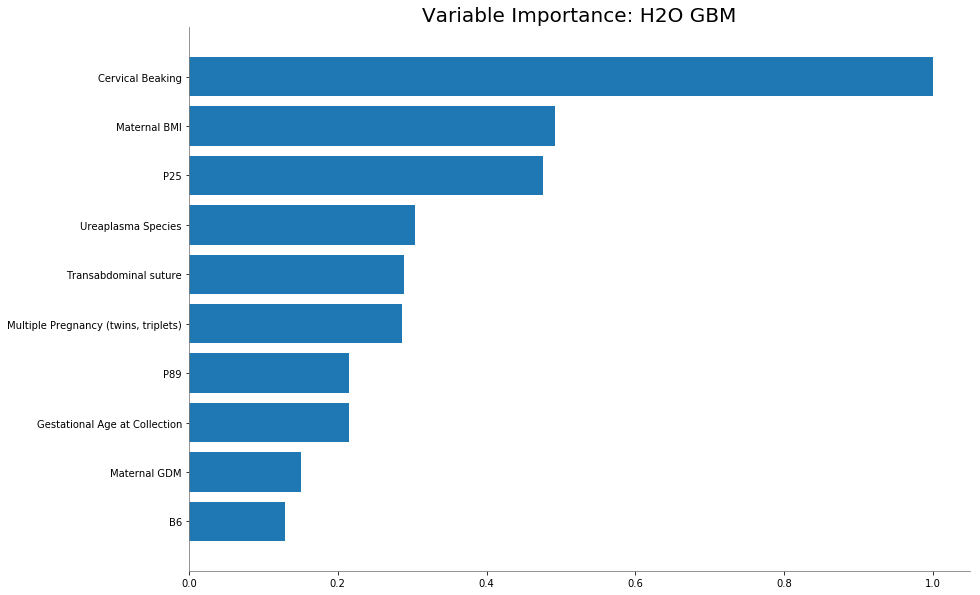

In [128]:
best_model_1.varimp_plot(10)

#### 4.2 Retrive the most important variables based on the 2nd best model:

In [129]:
matrix_VI_2=best_model_2.varimp(True)
matrix_VI_2.iloc[0:10]

,variable,relative_importance,scaled_importance,percentage
0,Maternal BMI,1.000000,1.000000,0.010413
1,Microbiology Culture,0.896979,0.896979,0.009340
2,Cervical Beaking,0.879866,0.879866,0.009162
3,Ureaplasma Species,0.854388,0.854388,0.008896
4,Uterine Malformation,0.820237,0.820237,0.008541
5,B6,0.750515,0.750515,0.007815
6,Cervical Sludge,0.747208,0.747208,0.007780
7,"Multiple Pregnancy (twins, triplets)",0.744277,0.744277,0.007750
8,Cervical change seen during speculum examination,0.735828,0.735828,0.007662
9,Transabdominal suture,0.735716,0.735716,0.007661


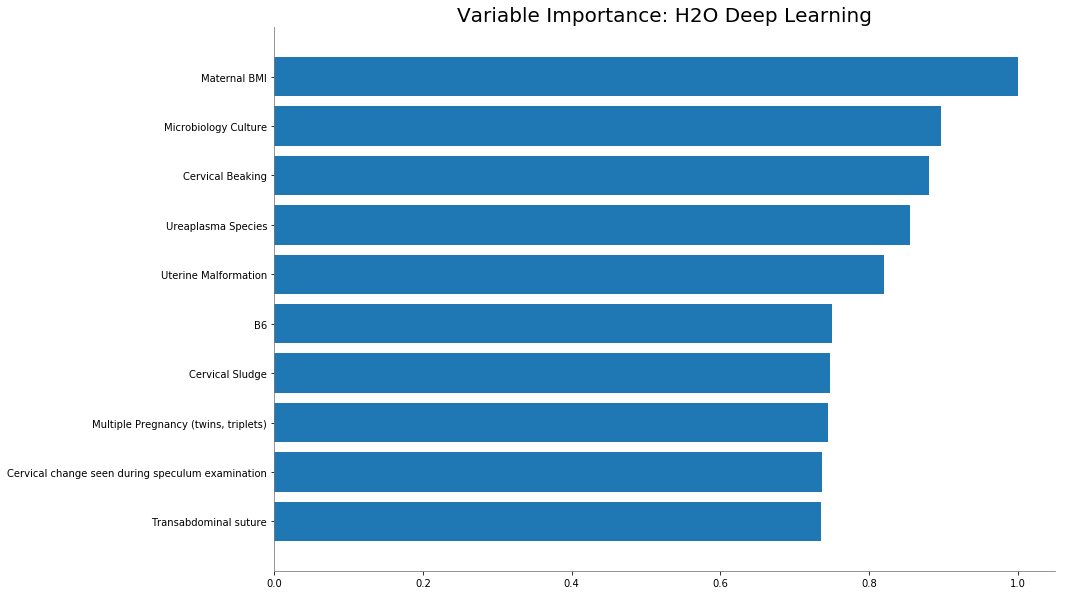

In [130]:
best_model_2.varimp_plot(10)

#### 4.3 Retrive the important variables based on 3rd best model:

- The top 10 most important variables based on model3：

In [131]:
matrix_VI_3=best_model_3.varimp(True)
matrix_VI_3.iloc[0:10]
#matrix_VI_3[matrix_VI['relative_importance']>1.0]

,variable,relative_importance,scaled_importance,percentage
0,Short Cervix (< 25 mm),1.000000,1.000000,0.007564
1,Maternal BMI,0.996769,0.996769,0.007539
2,P25,0.996708,0.996708,0.007539
3,Microbiology Culture,0.996129,0.996129,0.007534
4,Microbiology Notes,0.981399,0.981399,0.007423
5,P1,0.980280,0.980280,0.007414
6,P30,0.980012,0.980012,0.007412
7,P46,0.977253,0.977253,0.007391
8,P94,0.976146,0.976146,0.007383
9,P62,0.975381,0.975381,0.007377


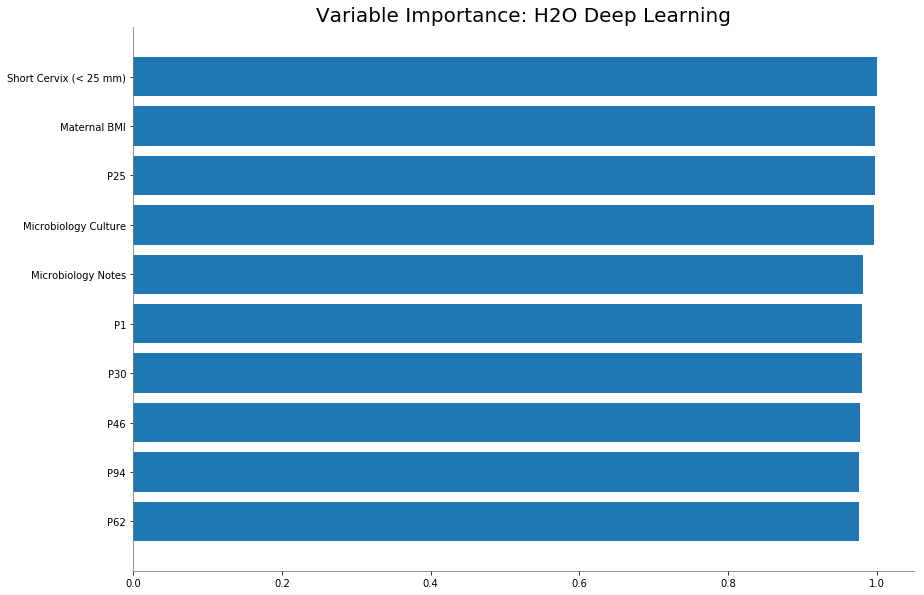

In [132]:
best_model_3.varimp_plot(10)

### <font color='red'> Session 4 Variable importance Conclusion: </font>  
- The most 5 important variables in:
    - Top 1 model- __DeepLearning_1__:  
        - <font color='red'>{{matrix_VI_1['variable'][0]}} </font>  
        - <font color='red'>{{matrix_VI_1['variable'][1]}}  </font>  
        - <font color='red'>{{matrix_VI_1['variable'][2]}}   </font>
        - <font color='red'>{{matrix_VI_1['variable'][3]}}   </font>
        - <font color='red'>{{matrix_VI_1['variable'][4]}}   </font>
        
    - Top 2 model - __GBM_1__:
        - <font color='red'>{{matrix_VI_2['variable'][0]}} </font>  
        - <font color='red'>{{matrix_VI_2['variable'][1]}}</font>  
        - <font color='red'>{{matrix_VI_2['variable'][2]}}</font>
        - <font color='red'>{{matrix_VI_2['variable'][3]}}   </font>
        - <font color='red'>{{matrix_VI_2['variable'][4]}}   </font>
        
    - Top 3 model -__DeepLearning_2__:
        - <font color='red'>{{matrix_VI_3['variable'][0]}}</font>  
        - <font color='red'>{{matrix_VI_3['variable'][1]}}</font>  
        - <font color='red'>{{matrix_VI_3['variable'][2]}}</font>
        - <font color='red'>{{matrix_VI_3['variable'][3]}}   </font>
        - <font color='red'>{{matrix_VI_3['variable'][4]}}   </font>
 
------------------------------------------

### <font color='red'>**(Optional) Session 5 'Partial dependence plot' on some top important features. </font>

#### The PDP plot shows:
    - whether the relationship between the target and a feature(cervical_beaking here) is linear, monotonic or more complex.
    - how this feature(cervical_beaking here) influences the prediction on average.  

#### 5.1: Retrive the PDP of top 1 important variable.

In [133]:
variable_top1 = [(matrix_VI.iloc[:,0])[0]]
print('The most important variable: ', variable_top1)

The most important variable:  ['Maternal BMI']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


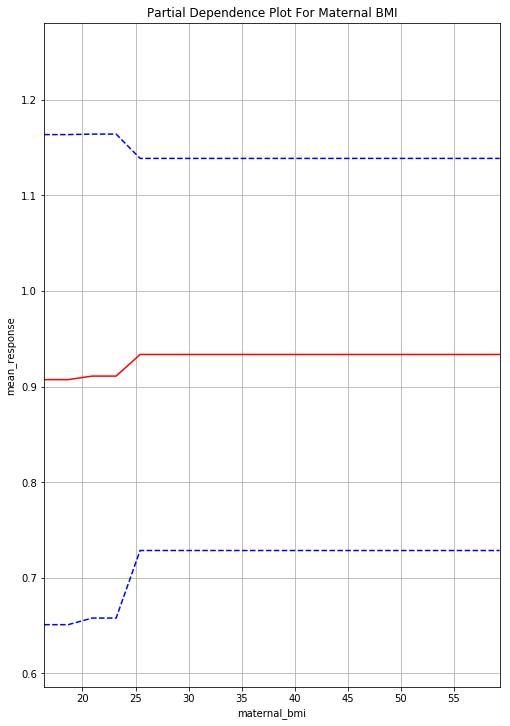

In [134]:
pdp_helpfulness = best_model_1.partial_plot(frame_training, cols = variable_top1)

##### How does {{variable_top1}} influence the response/target?
    - 1. Positive linear correlation when {{variable_top1}} in the range of 23-26;
    - 2. will not influence target too much before and after this range.

#### 5.2: Retrive the PDP: the most important variable in 2nd best model.

In [135]:
variable_top2 = [(matrix_VI_2.iloc[:,0])[0]]
print('The most important variable: ', variable_top2)

The most important variable:  ['Maternal BMI']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


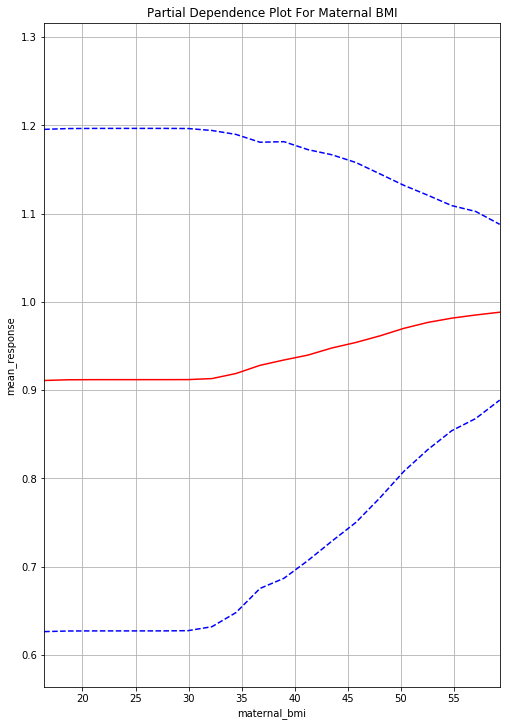

In [136]:
pdp_helpfulness_2 = best_model_2.partial_plot(frame_training, cols = variable_top2)

##### How {{variable_top2}} influence the target/response?
    - Sharply increase after {{variable_top2}} reaches 35.
    - No more influence before 35.

#### 5.3: Retrive the PDP: the most important variable in 3rd best model.

In [137]:
variable_top3 = [(matrix_VI_3.iloc[:,0])[0]]
print('The most important variable: ', variable_top3)

The most important variable:  ['Short Cervix (< 25 mm)']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


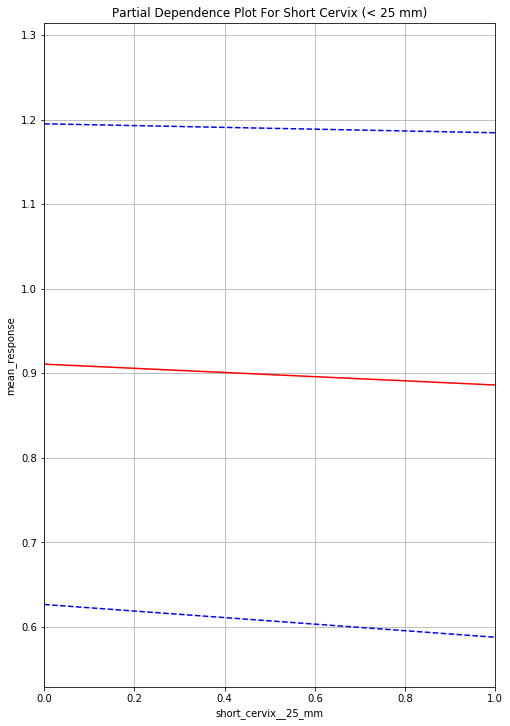

In [138]:
pdp_helpfulness_3 = best_model_3.partial_plot(frame_training, cols = variable_top3)

##### How {{variable_top3}} influence target/response?
    - Slightly negative correlation between the {{variable_top3}} and the target.

### <font color='red'>Session 5: Partial dependence plot Conclusion:</font>
  - For 1st best model-__{{best_model_1.model_id}}__ :   
       The most important variable <font color='red'>__'{{variable_top1}}'__</font>   is <font color='red'>  
    - 1. Positive linear correlation when {{variable_top1}} in the range of 23-26;  
    - 2. will not influence target too much before and after this range.  </font>.
   - For 2nd best model-__{{best_model_2.model_id}}__:  
       The most important variable <font color='red'>__'{{variable_top2}}'__</font> is <font color='red'>
      - Sharply increase after {{variable_top2}} reaches 35.  
      - No more influence before 35.  </font>.
   - For 3rd best model-__{{best_model_3.model_id}}__:  
       The most important variable <font color='red'>__'{{variable_top3}}'__</font> is <font color='red'>  
      - Slightly negative correlation between the {{variable_top3}} and the target.</font>.
------------------------------------------

### <font color='red'> Session 6: Predict Term on Production data:</font>
- Based on the picked best model & parameters: __'DeepLearning_grid_1_AutoML_20190801_170811_model_10'__

- Predict the term/pre-term based on __production data__; (Even though current(Jul.26 2019) production data missed 'Gestational Category at Delivery' column.)

#### 6.0: Convert to h2o frame: 

In [139]:
frame_production_preprocessed = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [140]:
frame_production_preprocessed.head(3)

Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
19.71,40.19,6,1,19.5,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,298.19,261.747,0.450185,2.32042,47.7542,5.05162,146.812,78050.2,134.241,691.925,14239.8,1506.34,43778,117.834,607.361,12499.5,1322.24,38427.7,1.04462,21.4982,2.27416,66.0928,110.81,11.7219,340.666,241.236,7010.91,741.641,29.9008,19.5931,0.0192997,11.2212,0.802725,0.591445,0.806324,1.0632,0.720426,1.82696,0.398706,0.613585,0.870457,0.527687,1.63422,0.402305,0.659177,0.316408,1.42294,0.874056,0.531286,1.63782,0.788159,1.89469,1.55192,0.896438,1.11132,1.36819,1.02542,2.13195,0.900037,1.15691,0.814139,1.92067,1.37179,1.02902,2.13555,1.28589,2.39243,2.04966,0.707298,0.96417,0.621401,1.72794,1.17905,0.836279,1.94281,1.09315,2.19969,1.85692,0.967769,0.624999,1.73153,0.881872,1.98841,1.64564,1.09675,2.20329,1.86052,2.11739,0.151805,0.046644,0.153596,0.28145,0.110842,0.6616,0.0285819,0.0941184,0.172463,0.0679202,0.405406,0.0289191,0.0529914,0.0208694,0.124566,0.174498,0.0687217,0.41019,0.125926,0.751632,0.296012
18.71,21.55,2,0,25.9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,400.607,136.302,0.157675,0.21961,57.4394,8.16566,28.2188,54603.6,63.1657,87.9773,23010.6,3271.22,11304.6,21.4915,29.9333,7829.12,1113,3846.28,0.034627,9.05676,1.28752,4.44939,12.6143,1.79326,6.19712,469.031,1620.87,230.425,41.5496,15.738,0.0599085,51.7879,0.827506,0.701506,0.69789,1.34883,1.02866,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.0620285,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.04012,0.935639,0.615463,0.860329,0.856712,1.50766,1.18748,1.083,0.730712,1.38166,1.06148,0.956997,1.37804,1.05786,0.95338,1.70881,1.60432,1.28415,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.19894,1.09446,0.774286,0.742177,0.422001,0.317519,1.07294,0.968462,0.648286,1.06933,0.964845,0.644669,1.29561,0.106202,0.0219479,0.0195295,0.454805,0.240708,0.170842,0.00521296,0.00463856,0.108023,0.0571718,0.0405776,0.000958613,0.0223242,0.0118152,0.00838585,0.0198644,0.0105133,0.00746183,0.244835,0.173772,0.0919697
17.71,31.74,2,0,22.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,372.616,897.391,6.27907,1.65981,102.23,38.1179,79.7012,334382,2339.68,618.472,38092.4,14203.3,29697.9,5634.78,1489.5,91739.8,34206.7,71523.1,10.4221,641.906,239.345,500.449,169.682,63.2685,132.289,3896.77,8147.82,3038.04,69.1692,87.973,0.0424764,6.07063,1.66762,1.92905,0.8427,1.83248,2.30234,1.34357,2.35275,1.2664,2.25618,2.72604,1.76727,1.52783,2.5176,2.98747,2.0287,1.43125,1.90112,0.942347,2.8909,1.93212,2.40199,2.97471,1.88836,2.87814,3.348,2.38923,2.14979,3.13957,3.60943,2.65066,2.05322,2.52308,1.56431,3.51286,2.55409,3.02395,2.57349,3.56326,4.03313,3.07436,2.47691,2.94678,1

#### 6.1: Prediction on the production data:

- Predict on production data with top 1 model trained.

In [141]:
pred_prod = aml.leader.predict(frame_production_preprocessed)

gbm prediction progress: |████████████████████████████████████████████████| 100%


c:\python37\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)': substituting in a column of NaN
  warnings.warn(w)


In [142]:
print(pred_prod)

predict,Preterm (?20 weeks < 37 weeks),Term
Term,0.0163606,0.983639
Term,0.0110808,0.988919
Term,0.00423085,0.995769
Term,0.00422903,0.995771
Term,0.0139216,0.986078
Term,0.00572588,0.994274
Preterm (?20 weeks < 37 weeks),0.0286945,0.971305
Preterm (?20 weeks < 37 weeks),0.0256641,0.974336
Term,0.00484564,0.995154
Term,0.00422887,0.995771


#### 6.2: Concat the prediction result with Production data.

- Concat the predicted result and seq no.

In [143]:
#pd_pred_prod = pred_prod.as_data_frame().predict

pd_pred_prod = pred_prod.as_data_frame()
# Convert prediction h2oframe to pandaframe, and get the prediction result of every observation.

seqNo_df = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.

In [144]:
#res_seqno_prediction = pd.concat([seqNo_df,pred_res],axis=1,ignore_index = True)
res_seqno_prediction = pd.concat([seqNo_df,pd_pred_prod],axis=1,ignore_index = True)

In [145]:
res_seqno_prediction.head(10)

,0,1,2,3
0,1,Term,0.016361,0.983639
1,3,Term,0.011081,0.988919
2,6,Term,0.004231,0.995769
3,7,Term,0.004229,0.995771
4,8,Term,0.013922,0.986078
5,9,Term,0.005726,0.994274
6,12,Preterm (?20 weeks < 37 weeks),0.028695,0.971305
7,13,Preterm (?20 weeks < 37 weeks),0.025664,0.974336
8,14,Term,0.004846,0.995154
9,16,Term,0.004229,0.995771


#### Output to model_1 csv:

In [146]:
res_seqno_prediction.to_csv('output/model1_'+best_model_1.model_id+'_prediction.csv')

#### 6.3.1 Get the predicted result based on 2nd best model:

In [147]:
pred_prod_2 = best_model_2.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [148]:
pd_pred_prod_2 = pred_prod_2.as_data_frame()
seqNo_df_2 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_2 = pd.concat([seqNo_df_2,pd_pred_prod_2],axis=1,ignore_index = True)

In [149]:
res_seqno_prediction_2.head(10)

,0,1,2,3
0,1,Term,3.358302e-19,1.000000
1,3,Term,7.236857e-16,1.000000
2,6,Term,2.292079e-21,1.000000
3,7,Term,4.211310e-15,1.000000
4,8,Term,3.218696e-22,1.000000
5,9,Preterm (?20 weeks < 37 weeks),9.988567e-01,0.001143
6,12,Term,2.666045e-16,1.000000
7,13,Term,6.742325e-19,1.000000
8,14,Term,2.238161e-18,1.000000
9,16,Term,4.980784e-25,1.000000


#### Output prediction based on model 2 to .csv:

In [150]:
res_seqno_prediction_2.to_csv('output/model2_'+best_model_2.model_id+'_prediction.csv')

#### 6.3.2 Get the predicted result based on 3rd best model:

In [151]:
pred_prod_3 = best_model_3.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [152]:
pd_pred_prod_3 = pred_prod_3.as_data_frame()
seqNo_df_3 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_3 = pd.concat([seqNo_df_3,pd_pred_prod_3],axis=1,ignore_index = True)

In [153]:
res_seqno_prediction_3.head(10)

,0,1,2,3
0,1,Term,6.141760e-07,0.999999
1,3,Term,1.650062e-06,0.999998
2,6,Term,4.270643e-09,1.000000
3,7,Term,1.251216e-06,0.999999
4,8,Term,9.669347e-10,1.000000
5,9,Term,5.053172e-02,0.949468
6,12,Term,5.361025e-04,0.999464
7,13,Term,7.189832e-08,1.000000
8,14,Term,6.898611e-07,0.999999
9,16,Term,4.847623e-12,1.000000


#### Output prediciton based on model3 to .csv:

In [154]:
res_seqno_prediction_3.to_csv('output/model3_'+best_model_3.model_id+'_prediction.csv')

### <font color='red'>Summary:</font>
- __Best models:__  
    - {{best_model_1.model_id}} 
    - {{best_model_2.model_id}} 
    - {{best_model_3.model_id}} 
     
- __Performance comparison:__  
<html>
<body>
<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>AUC</th> 
    <th>Cross-validation AUC</th>
    <th>MSE</th> 
    <th>logloss</th>
  </tr>
  <tr>
    <td>{{best_model_1.model_id}}</td>
    <td>{{best_model_1.auc()}}</td>
    <td>{{best_model_1.auc(xval=True)}}</td>
    <td>{{best_model_1.mse()}}</td>
    <td>{{best_model_3.logloss()}}</td>
  </tr>
  <tr>
    <td>{{best_model_2.model_id}}</td>
    <td>{{best_model_2.auc()}}</td>
    <td>{{best_model_2.auc(xval=True)}}</td>
    <td>{{best_model_2.mse()}}</td>
    <td>{{best_model_2.logloss()}}</td>
  </tr>
  <tr>
    <td>{{best_model_3.model_id}}</td>
    <td>{{best_model_3.auc()}}</td>
    <td>{{best_model_3.auc(xval=True)}}</td>
    <td>{{best_model_3.mse()}}</td>
    <td>{{best_model_3.logloss()}}</td>
  </tr>
</table>

</body>
</html>


In [155]:
#h2o.remove_all()

In [ ]:
#h2o.shutdown()